In [24]:
import requests

import json
from collections import deque
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
def beautify_json(json_data):
    return json.dumps(json_data, indent=4, sort_keys=True)

In [26]:
def dict_to_df(DB_dict,artists_name_dict):
    df = pd.DataFrame.from_dict(DB_dict, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['Artist'] + [f'Related_{i}' for i in range(1, df.shape[1])]
    df.replace(artists_name_dict, inplace=True)
    return df

Init 

In [27]:
artists_name_dict = {}
DB_dict={}
queue=deque()

Search artist id

In [28]:
artist_name = 'pink floyd'
search_url = f"https://api.deezer.com/search/artist?q={artist_name}"

response = requests.get(search_url)
search_data = response.json()
#search_nicedata=beautify_json(search_data)
#print(artist_nicedata)
artist_id = search_data['data'][0]['id']
queue.append(artist_id)
print(f"{artist_name} : {artist_id}")

pink floyd : 860


Related artist search

In [29]:
def related_artist_search(artist_id):
    related_artist_url=f"https://api.deezer.com/artist/{artist_id}/related"
    response = requests.get(related_artist_url)
    related_artist_data = response.json()
    #related_artist_nicedata=beautify_json(related_artist_data)
    #print(related_artist_nicedata)

    related_list = []
    for artist in related_artist_data['data']:
        artists_name_dict[artist['id']] = artist['name']
        related_list.append(artist['id'])
        queue.append(artist['id'])

    DB_dict[artist_id]=related_list
    

In [30]:
for i in range(100):
    artist_id=queue.popleft()
    while artist_id in DB_dict:
        artist_id=queue.popleft()
    related_artist_search(artist_id)



In [31]:
df=dict_to_df(DB_dict,artists_name_dict)
print(df.head(100))

                 Artist      Related_1                     Related_2  \
0            Pink Floyd   Led Zeppelin                 David Gilmour   
1          Led Zeppelin  Black Sabbath                    Pink Floyd   
2         David Gilmour     Pink Floyd                 Mark Knopfler   
3             The Doors   Led Zeppelin  Creedence Clearwater Revival   
4          Dire Straits  Mark Knopfler                  Eric Clapton   
..                  ...            ...                           ...   
95           Billy Joel         Eagles                    Elton John   
96          Rod Stewart       Bee Gees                   Bryan Adams   
97  The Doobie Brothers         Eagles                       America   
98             Bee Gees    Rod Stewart                 Lionel Richie   
99       George Michael     Simply Red                    Elton John   

             Related_3           Related_4           Related_5  \
0            The Doors        Dire Straits  The Rolling Stones   
1  

In [32]:
df

,Artist,Related_1,Related_2,Related_3,Related_4,Related_5,Related_6,Related_7,Related_8,Related_9,...,Related_11,Related_12,Related_13,Related_14,Related_15,Related_16,Related_17,Related_18,Related_19,Related_20
0,Pink Floyd,Led Zeppelin,David Gilmour,The Doors,Dire Straits,The Rolling Stones,Deep Purple,Supertramp,The Beatles,Black Sabbath,...,Jimi Hendrix,Bob Dylan,Eagles,Guns N' Roses,Eric Clapton,Lynyrd Skynyrd,Iron Maiden,Genesis,U2,Creedence Clearwater Revival
1,Led Zeppelin,Black Sabbath,Pink Floyd,The Doors,Deep Purple,The Rolling Stones,Pearl Jam,Guns N' Roses,Jimi Hendrix,Creedence Clearwater Revival,...,The Who,Lynyrd Skynyrd,Alice in Chains,Metallica,Ozzy Osbourne,Eric Clapton,ZZ Top,Rage Against the Machine,The Beatles,Aerosmith
2,David Gilmour,Pink Floyd,Mark Knopfler,Roger Waters,Eric Clapton,Genesis,Nick Cave & The Bad Seeds,Deep Purple,Neil Young,Peter Gabriel,...,Led Zeppelin,Bruce Springsteen,Steven Wilson,Jean-Michel Jarre,Fontaines D.C.,Santana,Rush,Yes,Jack White,The Doors
3,The Doors,Led Zeppelin,Creedence Clearwater Revival,The Rolling Stones,Black Sabbath,Jimi Hendrix,Pink Floyd,David Bowie,The Who,The Beatles,...,Janis Joplin,Rage Against the Machine,ZZ Top,Deep Purple,Serge Gainsbourg,Lynyrd Skynyrd,Nirvana,Noir Désir,Pearl Jam,Eric Clapton
4,Dire Straits,Mark Knopfler,Eric Clapton,Pink Floyd,Bruce Springsteen,Supertramp,Eagles,Scorpions,The Police,Creedence Clearwater Revival,...,The Rolling Stones,U2,Led Zeppelin,Genesis,Fleetwood Mac,Simple Minds,ZZ Top,Men at Work,a-ha,Neil Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Billy Joel,Eagles,Elton John,Rod Stewart,Bruce Springsteen,Toto,Electric Light Orchestra,Bee Gees,David Bowie,Supertramp,...,Stevie Wonder,The Beatles,Fleetwood Mac,Billy Idol,Simon & Garfunkel,Paul McCartney,Lionel Richie,Elvis Presley,Frank Sinatra,ABBA
96,Rod Stewart,Bee Gees,Bryan Adams,Elton John,Lionel Richie,Tina Turner,Eagles,Roxette,Bruce Springsteen,Phil Collins,...,Simply Red,Billy Joel,Joe Cocker,Toto,Genesis,Cyndi Lauper,Daryl Hall & John Oates,Eric Clapton,a-ha,Robbie Williams
97,The Doobie Brothers,Eagles,America,Steely Dan,"Earth, Wind & Fire",Supertramp,Daryl Hall & John Oates,Fleetwood Mac,Stevie Wonder,Eric Clapton,...,Bee Gees,Toto,Simply Red,The Rolling Stones,Elton John,Genesis,Aretha Franklin,George Benson,The Police,Lynyrd Skynyrd
98,Bee Gees,Rod Stewart,Lionel Richie,"Earth, Wind & Fire",Elton John,Phil Collins,Simply Red,George Michael,Air Supply,Barry White,...,ABBA,Boney M.,Diana Ross,Chicago,Kool & The Gang,Eagles,Elvis Presley,Marvin Gaye,Carpenters,Billy Joel


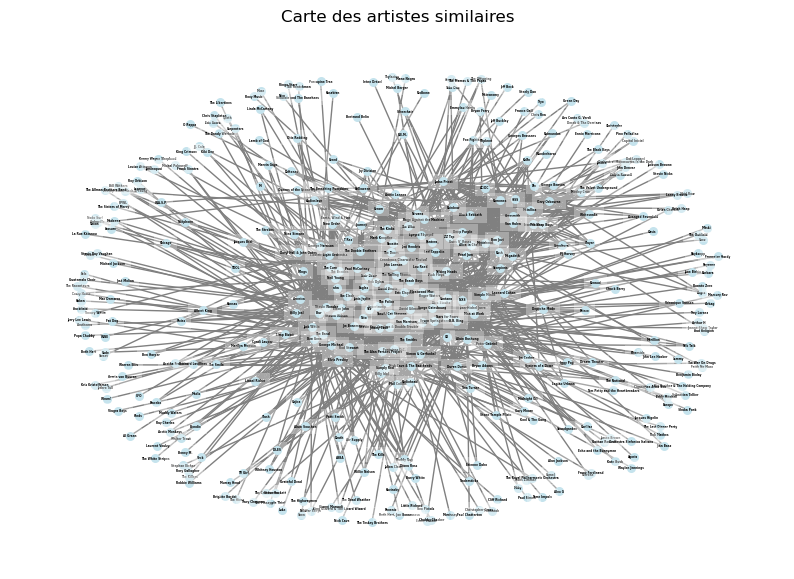

In [33]:
G = nx.Graph()

# Ajouter les nœuds et les arêtes
for index, row in df.iterrows():
    artiste = row['Artist']
    similaires = row[1:]  # Récupère les artistes similaires dans les colonnes suivantes
    for similaire in similaires:
        if pd.notna(similaire):  # Vérifie que ce n'est pas une valeur manquante
            G.add_edge(artiste, similaire)

# Visualisation du graphe
plt.figure(figsize=(10, 7))

# Disposition des nœuds avec plus d'espacement (ajustement du paramètre 'k')
pos = nx.spring_layout(G, k=0.5, iterations=50)  # k plus grand -> plus d'espacement entre les nœuds

# Dessiner les nœuds
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='lightblue')

# Dessiner les arêtes
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dessiner les étiquettes avec des boîtes de fond pour améliorer la lisibilité
labels = nx.draw_networkx_labels(G, pos, font_size=2, font_weight='bold')

# Ajouter des boîtes de fond (bbox) autour des étiquettes pour les rendre plus lisibles
for label in labels.values():
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.3))

plt.title('Carte des artistes similaires')
plt.axis('off')  # Enlever les axes

# Sauvegarder le graphique en tant que fichier SVG
plt.savefig('graphe_artistes_similaires.svg', format='svg')

# Affichage optionnel (si vous voulez encore voir l'image à l'écran)
# plt.show()

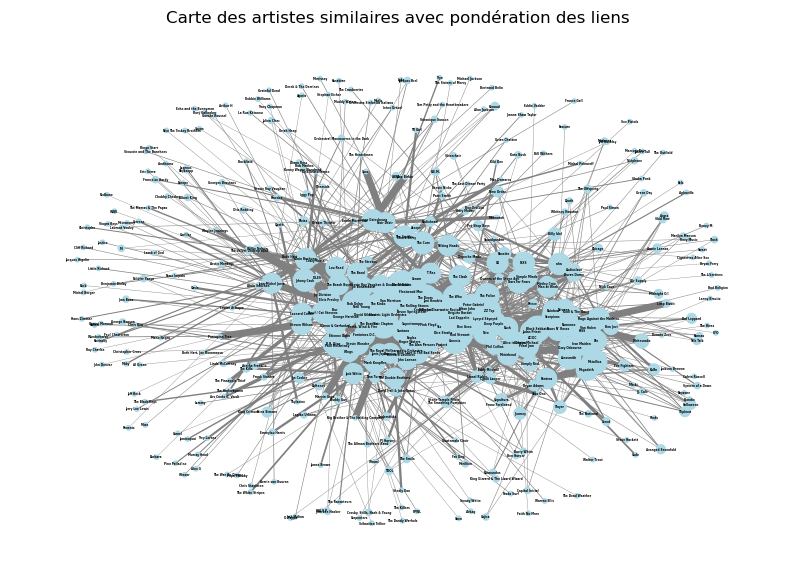

In [34]:
G = nx.Graph()

# Ajouter les nœuds et les arêtes avec des poids
for index, row in df.iterrows():
    artiste = row['Artist']
    similaires = row[1:]  # Récupère les artistes similaires dans les colonnes suivantes
    
    # Ajouter les arêtes avec un poids basé sur la colonne (les plus proches ont un poids plus élevé)
    for i, similaire in enumerate(similaires, start=1):
        if pd.notna(similaire):  # Vérifie que ce n'est pas une valeur manquante
            poids = 1 / i  # Plus la colonne est à gauche, plus le poids est élevé
            G.add_edge(artiste, similaire, weight=poids)

# Visualisation du graphe
plt.figure(figsize=(10, 7))

# Disposition des nœuds avec la pondération des arêtes
pos = nx.spring_layout(G, k=0.2, iterations=50, weight='weight')  # 'weight' influence la distance des liens

# Dessiner les nœuds (avec une taille de nœud proportionnelle au nombre de connexions)
node_sizes = [G.degree(n) * 10 for n in G.nodes()]  # Taille des nœuds basée sur le degré (nombre de connexions)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')

# Récupérer les poids pour ajuster l'épaisseur des arêtes
edges = G.edges(data=True)
weights = [edge_data['weight'] for _, _, edge_data in edges]

# Dessiner les arêtes avec une épaisseur proportionnelle au poids
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[5 * w for w in weights], edge_color='gray')

# Dessiner les étiquettes avec des boîtes de fond pour améliorer la lisibilité
labels = nx.draw_networkx_labels(G, pos, font_size=2, font_weight='bold')


plt.title('Carte des artistes similaires avec pondération des liens')
plt.axis('off')  # Enlever les axes

# Sauvegarder le graphique en tant que fichier SVG (image vectorielle)
plt.savefig('graphe_artistes_similairer.svg', format='svg')

plt.show()